# Web Scraping
## website: [_Surplus Sale Items_](https://web.byui.edu/SurplusList/)
### Author: Pedro Sanhueza
### Project: Simple Analysis of items for sale. Import table from website to csv for EDA

# Import Libraries

In [1]:
import requests # to get the html markdown from the url
from bs4 import BeautifulSoup # to make the html readable
import pandas as pd # to save table in a csv
from datetime import datetime # to append current time into file name

# Get the data from website

In [2]:
url_surplus = 'https://web.byui.edu/SurplusList/'
html_data = requests.get(url_surplus)
soup = BeautifulSoup(html_data.text, 'html.parser')

# Build Table

In [3]:
rows=[]
for item in soup.find_all('tr')[13:]:
    row={}
    row['Item Number'] = item.select('td')[0].text
    row['Qty'] = item.select('td')[1].text
    row['Description'] = item.select('td')[2].text
    row['Condition'] = item.select('td')[3].text
    row['Price'] = item.select('td')[4].text
    row['Location'] = item.select('td')[5].text
    row['Quick/Bid'] = item.select('td')[6].text
    row['Image'] = item.select('td')[7].text
    rows.append(row)


In [4]:
data = pd.DataFrame(rows)

pd.set_option('display.max_rows', None)

data

,Item Number,Qty,Description,Condition,Price,Location,Quick/Bid,Image
0,77122,1,BKI Free Standing Fry Dump Station or Food Wa...,GOOD,$175.00,EA,Quick,Image
1,75191,1,Catalyst 6500 Chassis,GOOD,$50.00,UT,Quick,
2,76137,1,Chick-fil-A Sandwich and Fry Display,GOOD,$121.25,EA,Quick,Image
3,75173,1,Cisco 6500 series chassis,GOOD,$50.00,EA,Quick,
4,75176,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
5,75177,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
6,75178,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
7,75179,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
8,75180,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
9,75181,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,


## Save to CSV 

In [ ]:
# date = datetime.now().strftime("%d-%m-%Y %H%M%S") # get local time as string

# filePath = "../Surplus - Historical Data/SurplusSaleItems " + date + " - Webscrape.csv"

# data.to_csv(filePath, index=False) # save to file path

## Simple Data Analysis 

In [5]:
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
data.drop(data.tail(1).index,inplace=True) # Drop last row (is empty)
data.describe()

,Item Number,Qty,Description,Condition,Price,Location,Quick/Bid,Image
count,50,50,50,50,50,50,50,50
unique,50,10,23,6,16,2,1,2
top,77122,1,Cisco 6500 series chassis,GOOD,$50.00,UT,Quick,
freq,1,41,28,39,31,29,50,39



CONDITION OF ITEMS

PLOT: ITEMS BASED ON CONDITION



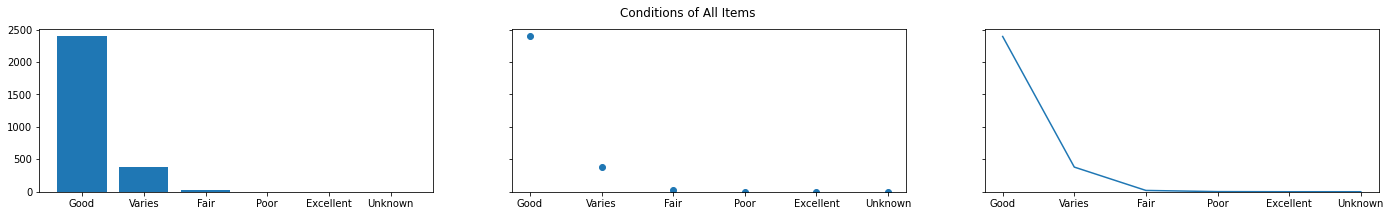

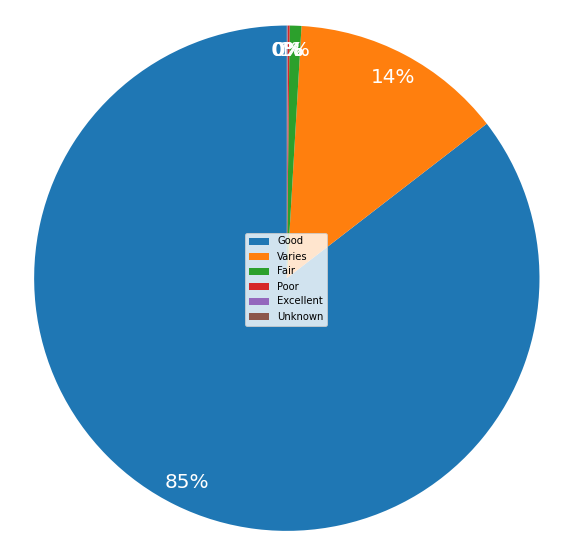

In [7]:
# Change column data types
data.Price = pd.to_numeric(data.Price.str.replace("$","",regex=True).replace(",","",regex=True))
data['Item Number'] = pd.to_numeric(data['Item Number'])
# data.Qty = pd.to_numeric(data.Qty)
data.Qty = data.Qty.apply(lambda x: int(x))
data.Condition = data.Condition.str.capitalize()
a = data.copy()

# repeat rows based on quantity
data = data.reindex(data.index.repeat(data.Qty)).reset_index().drop(['index','Qty'], axis=1)

print(
"""
CONDITION OF ITEMS

PLOT: ITEMS BASED ON CONDITION
"""
)

names = data['Condition'].value_counts().reset_index()['index']
values = data['Condition'].value_counts().reset_index()['Condition']

fig, axs = plt.subplots(1, 3, figsize=(24, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Conditions of All Items')

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(values, autopct='%1.0f%%', startangle=90,textprops={'color':"w",'fontsize': 20},pctdistance=0.9)
ax1.axis('equal')
plt.legend(names, loc="center")

In [12]:
data['Condition'].value_counts().reset_index()[['index','Condition']]

,index,Condition
0,Good,2394
1,Varies,381
2,Fair,21
3,Poor,3
4,Excellent,1
5,Unknown,1


In [9]:
values

0    2394
1     381
2      21
3       3
4       1
5       1
Name: Condition, dtype: int64

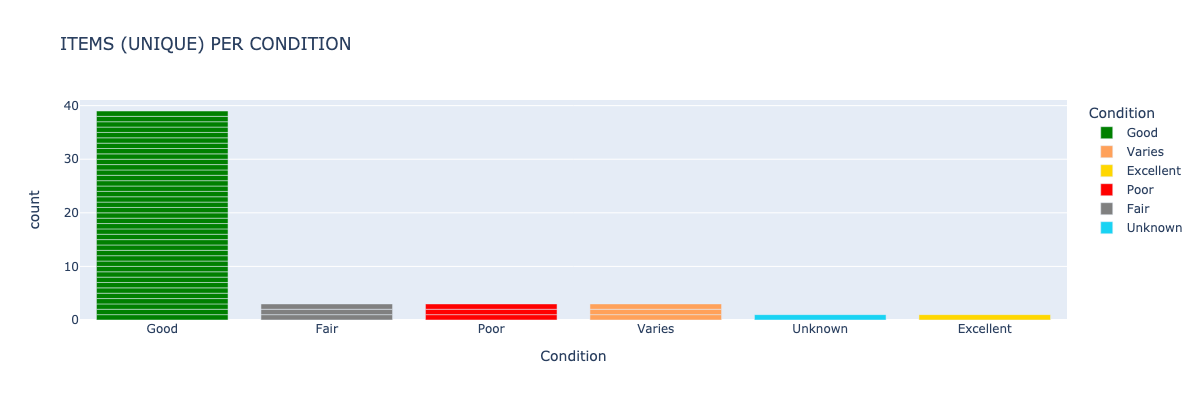

In [13]:

fig = px.bar(
    a,
    # y='Price',
    x='Condition',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold','Poor':'red'},
    title="ITEMS (UNIQUE) PER CONDITION",
    width=1200, height=400
    )

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show('png')


In [14]:
print('TABLE: ITEMS AMOUNT PER CONDITION')
data['Condition'].value_counts()

TABLE: ITEMS AMOUNT PER CONDITION


Good         2394
Varies        381
Fair           21
Poor            3
Excellent       1
Unknown         1
Name: Condition, dtype: int64

In [15]:
# Top 10 expensive items - overall
print(
"""
TOP 10 MOST EXPENSIVE ITEMS
"""
)

a = data.sort_values('Price',ascending=False).head(10)[['Description','Price','Condition']].reset_index().drop('index',axis=1)
a


TOP 10 MOST EXPENSIVE ITEMS



,Description,Price,Condition
0,"Electrolux Professional Ag, Ch-6210 Sursee Til...",8750.00,Good
1,Wiedermann Machine Company----- TURETT PUNCH,1500.00,Good
2,Electric Pie Press with extras,750.00,Good
3,Computer storage cart with wheels,300.00,Excellent
4,BKI Free Standing Fry Dump Station or Food Wa...,175.00,Good
5,Chick-fil-A Sandwich and Fry Display,121.25,Good
6,Fry Catch Basin,118.75,Good
7,Cisco 6500 series chassis,50.00,Good
8,Cisco 6500 series chassis,50.00,Good
9,Cisco 6500 series chassis,50.00,Good


In [16]:
# Top 10 expensive items - overall
print(
"""
TOP 10 MOST EXPENSIVE ITEMS
"""
)

fig = px.bar(
    a,
    y='Description',
    x='Price',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold'},
    orientation='h',
    title="TOP 10 MOST EXPENSIVE ITEMS",
    width=1200, height=400
    )

# fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()


TOP 10 MOST EXPENSIVE ITEMS



In [ ]:
# Bottom 10 cheapest items - overall

print('TOP 10 CHEAPEST ITEMS')


a = data.sort_values('Price',ascending=False).tail(10)[['Description','Price','Condition']].reset_index().drop('index',axis=1)
a

In [ ]:
# Bottom 10 expensive items - overall

print('TOP 10 CHEAPEST ITEMS')

fig = px.bar(
    a,
    y='Description',
    x='Price',
    color='Condition',
    color_discrete_map={'Good':'green','Fair':'gray','Excellent':'gold','Poor':'red'},
    orientation='h',
    title='TOP 10 CHEAPEST ITEMS',
    width=1200, height=400
    )

# fig.update_layout(yaxis={'categoryorder':'total ascending'})

fig.show()

In [ ]:
# Top 10 highest price items - with Excellent condition

print('Top 10 highest price items - with Excellent condition')

data[
    (~data.Description.duplicated()) & # remove duplicates
    (data.Condition == 'Excellent') # filter by condition = Excellent
].sort_values('Price',ascending=False).head(10)[ # top 10
    ['Description','Price','Condition'] # select columns 
].reset_index().drop('index',axis=1) # reset index

In [ ]:
# Top 10 higest price items - with Good condition

print('Top 10 higest price items - with \'Good\' condition \n')

data[
    (~data.Description.duplicated()) & # remove duplicates
    (data.Condition == 'Good') # filter by condition = Excellent
].sort_values('Price',ascending=False).head(10)[ # top 10
    ['Description','Price','Condition'] # select columns 
].reset_index().drop('index',axis=1) # reset index


In [ ]:
# If they were to sell all the items, how much money would they have?

all_items       = "${:,.2f}".format(data.Price.sum())
excellent_items = "${:,.2f}".format(data[data.Condition=='Excellent']['Price'].sum())
good_items      = "${:,.2f}".format(data[data.Condition=='Good']['Price'].sum())
fair_items      = "${:,.2f}".format(data[data.Condition=='Fair']['Price'].sum())
poor_items      = "${:,.2f}".format(data[data.Condition=='Poor']['Price'].sum())
varies_items    = "${:,.2f}".format(data[data.Condition=='Varies']['Price'].sum())
unknown_items   = "${:,.2f}".format(data[data.Condition=='Unknown']['Price'].sum())

print(f"""
IF WERE TO SELL ALL ITEMS

Sell from all items:\t\t{all_items}

Sell from Excellent items:\t{excellent_items}
Sell from Good items:\t\t{good_items}
Sell from Fair items:\t\t{fair_items}
Sell from Poor items:\t\t{poor_items}
Sell from Varies items:\t\t{varies_items}
Sell from Unknown items:\t{unknown_items}
""")
